In [2]:
import pandas as pd
from konlpy.tag import Kkma

### 데이터 불러오기

In [38]:
# 배달의 민족 리뷰 데이터
reviews = pd.read_csv('data/배달의민족댓글.csv', index_col=0, encoding="utf8")
print(reviews.head())
print(reviews.shape)

                                                  댓글
0                                                NaN
1                                                NaN
2                                                NaN
3  80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
4  음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
(463, 1)


### 데이터 전처리

In [39]:
reviews.dropna(inplace=True)
reviews.reset_index(drop=True, inplace=True)
reviews

,댓글
0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
...,...
455,우선 배달업체 광고가 너무 많습니다. 두번째는 주문직전 주소바꾸기 안되는게 매우매우...
456,배민 쭉 써왔고 쓴소리 하나 하려합니다. 중간다리 플랫폼으로서 식당/유저 사이 중재...
457,업데이트된거 디자인 너무 불편해요. 배민1 부분에서 음식점 둘러보는데 빨리 한거번에...
458,첫주문도 아닌데 첫주문 할인받으로 광고 계속오고 친구초대 하려하니까 주문내역이 없다...


In [ ]:
# re 사용 예제
import re
text = "오늘!!!          hello      abㅁㄴ 기분 좋아 ㅁㅁㅎㅇ 123 xyz"
print(text)
text = re.sub("[^\\w\\s]", "", text)  # 문자, 숫자, 공백이 아닌 문자열을 제거
print(text)
text = re.sub("\\s+", " ", text)  # 1개 이상 반복되는 공백을 1개의 공백으로 치환
print(text)
text = re.sub("\\d", "", text)  # 숫자 제거
print(text)

오늘!!!          hello      abㅁㄴ 기분 좋아 ㅁㅁㅎㅇ 123 xyz
오늘          hello      abㅁㄴ 기분 좋아 ㅁㅁㅎㅇ 123 xyz
오늘 hello abㅁㄴ 기분 좋아 ㅁㅁㅎㅇ 123 xyz
오늘 hello abㅁㄴ 기분 좋아 ㅁㅁㅎㅇ  xyz
b'\xe3\x85\xa3'
b'\xe3\x85\xa2'
b'\xe3\x85\x98'


In [59]:
import re

# reviews['댓글'] = reviews['댓글'].map(lambda x: x.encode('cp949', 'ignore').decode('cp949'))  # 댓글 이모지 제거
# reviews['review'] = reviews['댓글'].map(lambda x: re.sub("[^가-힣\\s+\\d+]", "", x))
reviews['review'] = reviews['댓글'].map(lambda x: re.sub("[^\\w\\s]", "", x))
reviews['s_len_ori'] = reviews['댓글'].map(lambda x: len(str(x)))  # 원본 리뷰 글자 수 컬럼 추가
reviews['s_len'] = reviews['review'].map(lambda x: len(str(x)))  # 리뷰 글자 수 컬럼 추가

reviews['review'][80]

'배달이 완료되면 바로 리뷰를 달 수 있는 버튼이 나오면 좋겠음 분명 배달이 완료되었는데 리뷰 쓰는 버튼이 없어서잠깐 기다리다가 깜빡 잊어버리는 경우도 생김 사장님들과의 약속을 저버릴 수 있음ㅡㅡ'

In [15]:
# 데이터 저장
reviews.to_csv("data/baemin_review.csv", index=False)

### 데이터 탐색

In [60]:
kkma = Kkma()
print(reviews['review'][80])
print(kkma.pos(reviews['review'][80]))

배달이 완료되면 바로 리뷰를 달 수 있는 버튼이 나오면 좋겠음 분명 배달이 완료되었는데 리뷰 쓰는 버튼이 없어서잠깐 기다리다가 깜빡 잊어버리는 경우도 생김 사장님들과의 약속을 저버릴 수 있음ㅡㅡ
[('배달', 'NNG'), ('이', 'JKS'), ('완료', 'NNG'), ('되', 'XSV'), ('면', 'ECE'), ('바로', 'MAG'), ('리뷰', 'NNG'), ('를', 'JKO'), ('달', 'VV'), ('ㄹ', 'ETD'), ('수', 'NNB'), ('있', 'VV'), ('는', 'ETD'), ('버튼', 'NNG'), ('이', 'JKS'), ('나오', 'VV'), ('면', 'ECE'), ('좋', 'VA'), ('겠', 'EPT'), ('음', 'ETN'), ('분', 'NR'), ('명', 'NNM'), ('배달', 'NNG'), ('이', 'JKS'), ('완료', 'NNG'), ('되', 'XSV'), ('었', 'EPT'), ('는데', 'ECD'), ('리', 'NNG'), ('뷰', 'NNG'), ('쓰', 'VV'), ('는', 'ETD'), ('버튼', 'NNG'), ('이', 'JKS'), ('없', 'VA'), ('어서', 'ECD'), ('잠깐', 'MAG'), ('기다리', 'VV'), ('다가', 'ECD'), ('깜빡', 'MAG'), ('잊어버리', 'VV'), ('는', 'ETD'), ('경우', 'NNG'), ('도', 'JX'), ('생기', 'VV'), ('ㅁ', 'ETN'), ('사장님', 'NNG'), ('들', 'XSN'), ('과의', 'NNG'), ('약속', 'NNG'), ('을', 'JKO'), ('저버리', 'VV'), ('ㄹ', 'ETD'), ('수', 'NNB'), ('있', 'VV'), ('음', 'ETN'), ('ㅡㅡ', 'EMO')]


In [62]:
# 모든 댓글에 대해 반복문을 통해 word_list 만들기
word_list = []
for review in reviews['review']:
    nouns = kkma.nouns(review)
    word_list.extend(nouns)

print(len(word_list), word_list[:20])

12328 ['80', '80분', '분', '주문', '주문취소', '취소', '주문내역', '내역', '계속', '최신', '정보', '로', '로딩반복', '딩', '반복', '로딩', '이미지', '안정적', '네트워크', '상황']


In [ ]:
# 모든 댓글에 대해 to_list 통해 word_list 만들기
review_list = reviews['review'].to_list()
review_text = "\n".join(review_list)
print(review_text[:200])
word_list2 = kkma.nouns(review_text)

80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요
음식 하나 시키는
12328 3284


In [69]:
print(len(word_list), len(word_list2))
print(word_list[:100])
print(word_list2[:100])

12328 3284
['80', '80분', '분', '주문', '주문취소', '취소', '주문내역', '내역', '계속', '최신', '정보', '로', '로딩반복', '딩', '반복', '로딩', '이미지', '안정적', '네트워크', '상황', '하', '고침', '무한로딩', '진행', '진행중인', '중인', '정확', '코로나', '때문', '서버', '불안정', '무엇', '결국', '음식', '하나', '우리', '우리나라', '나라', '앱들', '1', '국내', '번호', '필요', '인증', '필수', '2', '카드', '결제', '결제선택', '선택', '은행앱', '3', '3번정도', '번', '정도', '함', '해외', '해외카드', '결제수단', '수단', '현금', '현금결제', '옵션', '밖', '강국', '핸드폰', '카드인증등', '등', '불편', '스탭', '앱', '사용중', '쪽', '결국', '저녁', '하', '외국', '외국거주자', '거주자', '방법', '업데이트', '때', '사용', '사용하기', '하기', '불편', '클릭', '일반', '일반결제', '결제', '기본', '기본임', '임', '저쪽', '구석', '한집', '한집배달', '배달', '유도', '메인']
['80', '80분', '분', '주문', '주문취소', '취소', '주문내역', '내역', '계속', '최신', '정보', '로', '로딩반복', '딩', '반복', '로딩', '이미지', '안정적', '네트워크', '상황', '하', '고침', '무한로딩', '진행', '진행중인', '중인', '정확', '코로나', '때문', '서버', '불안정', '무엇', '결국', '음식', '하나', '우리', '우리나라', '나라', '앱들', '1', '국내', '번호', '필요', '인증', '필수', '2', '카드', '결제', '결제선택', '선택', '은행앱', '3', '3번정도', '번', '정도', '함', '해외'

In [80]:
# 나누어서 형태소 분석 vs 한번에 형태소 분석 - 성능 및 품질 비교
from datetime import datetime

# 나누어서 형태소 분석
start = datetime.now()
word_list = [kkma.nouns(review) for review in reviews['review']]
word_list = sum(word_list, [])
print(datetime.now() - start)  # 약 14초
print(len(word_list))  # 12328건
print(word_list[100:120])
print(word_list[-20:], '\n')

# 한번에 형태소 분석
start = datetime.now()
review_list = reviews['review'].to_list()
review_text = "\n".join(review_list)
word_list2 = kkma.nouns(review_text)
print(datetime.now() - start)  # 약 11초
print(len(word_list2))  # 3284건
print(word_list2[100:120])
print(word_list2[-20:], '\n')

0:00:14.154258
12328
['이젠', '결제창', '창', '요청', '요청사항', '사항', '리뷰', '리뷰이벤트', '이벤트', '짓', '배민', '배달', '민족앱자체', '만족', '식사', '식사후', '후', '맛', '리뷰', '평점']
['불가능', '추기능', '기능', '거', '메뉴', '문의', '채팅', '답변', '데', '20', '20분', '분', '걸', '1', '1시간', '시간', '이거', '리뷰', '플', '삭제'] 

0:00:11.097740
3284
['요청', '요청사항', '사항', '리뷰', '리뷰이벤트', '이벤트', '짓', '배', '배민', '민', '민족앱자체', '만족', '식사', '식사후', '후', '맛', '평점', '자체', '클린', '지진']
['전체취소', '우회적', '현', '요구', '현실', '거번', '관건', '소개', '공', '공간', '간', '낭비심해', '심해', '있게해주새', '할인받', '계속오고', '친구초대', '추', '불가하다', '추기능'] 



### WordCloud

In [ ]:
# # 나누어서 형태소 분석을 진행하는 경우와 한번에 진행하는 경우의 결과 수 차이 원인 파악 필요
# word_list2_tmp = word_list2[:]
# for i, w in enumerate(word_list):
#     w_tmp = word_list2_tmp.pop(0)
#     if w_tmp == w:
#         print(i, w_tmp, w)
#     # if w_tmp != w:
#     #     print(i, w_tmp, w)
#     else:
#         word_list2_tmp.insert(0, w_tmp)


In [98]:
from collections import Counter
import pprint
counter = Counter(word_list)
pprint.pp(counter)

Counter({'배달': 260,
         '주문': 161,
         '수': 141,
         '시간': 140,
         '거': 130,
         '가게': 111,
         '배민': 104,
         '배': 103,
         '때': 96,
         '1': 89,
         '불편': 86,
         '앱': 83,
         '전화': 75,
         '기능': 72,
         '고객': 71,
         '메뉴': 71,
         '분': 70,
         '음식': 69,
         '사용': 68,
         '민': 67,
         '리뷰': 65,
         '취소': 55,
         '번': 55,
         '센터': 53,
         '안': 50,
         '연결': 49,
         '2': 48,
         '고객센터': 48,
         '문제': 47,
         '점': 46,
         '이용': 46,
         '플': 45,
         '업데이트': 44,
         '결제': 43,
         '개': 43,
         '한집': 42,
         '이상': 42,
         '검색': 41,
         '집': 39,
         '시': 39,
         '생각': 38,
         '상담': 36,
         '말': 36,
         '건': 36,
         '3': 35,
         '화면': 35,
         '중': 35,
         '사람': 35,
         '개선': 34,
         '원': 34,
         '데': 34,
         '쿠폰': 34,
         '하나': 33,
   

In [ ]:
word_list = [kkma.nouns(review) for review in reviews['review']]
word_list = sum(word_list, [])
print(len(word_list))  # 12328건
print(word_list[:20])
# 추가 조건
# 나눠진 문자의 길이가 1이라면 word_list에 포함하지 않는다.
word_list = [w for w in word_list if len(re.sub('\\d', '', w)) > 1]
print(len(word_list))  # 9107건
print(word_list[:20])
# 불용어에 포함된 글자면 word_list에 포함하지 않는다.
stopword = ["배민", "민족"]
word_list = [w for w in word_list if w not in stopword]
print(len(word_list))  # 8981건
print(word_list[:20])



12328
['80', '80분', '분', '주문', '주문취소', '취소', '주문내역', '내역', '계속', '최신', '정보', '로', '로딩반복', '딩', '반복', '로딩', '이미지', '안정적', '네트워크', '상황']
9107
['주문', '주문취소', '취소', '주문내역', '내역', '계속', '최신', '정보', '로딩반복', '반복', '로딩', '이미지', '안정적', '네트워크', '상황', '고침', '무한로딩', '진행', '진행중인', '중인']
8981
['주문', '주문취소', '취소', '주문내역', '내역', '계속', '최신', '정보', '로딩반복', '반복', '로딩', '이미지', '안정적', '네트워크', '상황', '고침', '무한로딩', '진행', '진행중인', '중인']


In [125]:
from collections import Counter
from wordcloud import WordCloud
import koreanize_matplotlib  # 한글 출력
from matplotlib import pyplot as plt

counter = Counter(word_list)
counter_mc = dict(counter.most_common(30))
print(counter_mc)

{'배달': 260, '주문': 161, '시간': 140, '가게': 111, '불편': 86, '전화': 75, '기능': 72, '고객': 71, '메뉴': 71, '음식': 69, '사용': 68, '리뷰': 65, '취소': 55, '센터': 53, '연결': 49, '고객센터': 48, '문제': 47, '이용': 46, '업데이트': 44, '결제': 43, '한집': 42, '이상': 42, '검색': 41, '생각': 38, '상담': 36, '화면': 35, '사람': 35, '개선': 34, '쿠폰': 34, '하나': 33}


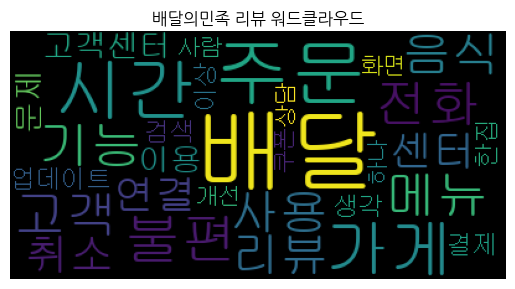

In [126]:
wordcloud = WordCloud(
    font_path="C:/Windows/Fonts/NGULIM.TTF"
).generate_from_frequencies(counter_mc)
plt.imshow(wordcloud)
plt.title("배달의민족 리뷰 워드클라우드")
plt.axis("off")
plt.show()

### 장바구니 분석 (연관성 분석)

In [131]:
# 장바구니 분석
# 문장 단위의 명사 리스트 필요
reviews['review']
stopword = ["배민", "민족"]

sentence_word_list = []
for r in reviews['review']:
    nouns = kkma.nouns(r)
    nouns = [n for n in nouns if len(re.sub('\\d', '', n)) > 1]
    nouns = [n for n in nouns if n not in stopword]
    sentence_word_list.append(nouns)



In [132]:
print(sentence_word_list[0])
print(sentence_word_list[1])

['주문', '주문취소', '취소', '주문내역', '내역', '계속', '최신', '정보', '로딩반복', '반복', '로딩', '이미지', '안정적', '네트워크', '상황', '고침', '무한로딩', '진행', '진행중인', '중인', '정확', '코로나', '때문', '서버', '불안정', '무엇', '결국']
['음식', '하나', '우리', '우리나라', '나라', '앱들', '국내', '번호', '필요', '인증', '필수', '카드', '결제', '결제선택', '선택', '은행앱', '3번정도', '정도', '해외', '해외카드', '결제수단', '수단', '현금', '현금결제', '옵션', '강국', '핸드폰', '카드인증등', '불편', '스탭', '사용중', '결국', '저녁', '외국', '외국거주자', '거주자', '방법']


In [ ]:
# Support(지지도): 얼마나 자주 발생하는가
# Confidence(신뢰도): (A, B) A가 발생했을 때 B가 발생할 확률
# Lift(향상도): (A, B) A와 B가 독립적인 경우에 비해 A가 발생할 때 B가 발생할 비율
### Lift(A, B)) = 1.5: A가 있는 경우 B가 발생할 가능성이 1.5배 높다
### Lift값이 1보다 크면 양의 상관관계, 1보다 작으면 음의 상관관계

In [193]:
from apyori import apriori

result = list(apriori(sentence_word_list))
pprint.pp(result[24].ordered_statistics)
data = pd.DataFrame(result)
print(data.sort_values("support", ascending=False).head())

[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'배달', '시간'}), confidence=0.22391304347826088, lift=1.0),
 OrderedStatistic(items_base=frozenset({'배달'}), items_add=frozenset({'시간'}), confidence=0.3961538461538462, lift=1.457846153846154),
 OrderedStatistic(items_base=frozenset({'시간'}), items_add=frozenset({'배달'}), confidence=0.8240000000000001, lift=1.457846153846154)]
       items   support                                 ordered_statistics
7       (배달)  0.565217              [((), (배달), 0.5652173913043478, 1.0)]
16      (주문)  0.350000                            [((), (주문), 0.35, 1.0)]
11      (시간)  0.271739              [((), (시간), 0.2717391304347826, 1.0)]
0       (가게)  0.241304             [((), (가게), 0.24130434782608695, 1.0)]
24  (배달, 시간)  0.223913  [((), (배달, 시간), 0.22391304347826088, 1.0), ((배...


In [212]:
# 아이템 개수를 나타내는 열 생성
data["length"] = [len(i) for i in data["items"]]
print(data.head())

data2 = data.loc[data["length"] == 2]
data2

    items   support                        ordered_statistics  length
0    (가게)  0.241304    [((), (가게), 0.24130434782608695, 1.0)]       1
1    (고객)  0.154348    [((), (고객), 0.15434782608695652, 1.0)]       1
2  (고객센터)  0.104348  [((), (고객센터), 0.10434782608695652, 1.0)]       1
3    (기능)  0.156522     [((), (기능), 0.1565217391304348, 1.0)]       1
4    (리뷰)  0.128261     [((), (리뷰), 0.1282608695652174, 1.0)]       1


,items,support,ordered_statistics,length
18,"(가게, 배달)",0.163043,"[((), (가게, 배달), 0.16304347826086957, 1.0), ((가...",2
19,"(가게, 주문)",0.121739,"[((), (가게, 주문), 0.12173913043478261, 1.0), ((가...",2
20,"(고객센터, 고객)",0.104348,"[((), (고객센터, 고객), 0.10434782608695652, 1.0), (...",2
21,"(배달, 고객)",0.100000,"[((), (배달, 고객), 0.1, 1.0), ((고객), (배달), 0.6478...",2
22,"(고객, 센터)",0.108696,"[((), (고객, 센터), 0.10869565217391304, 1.0), ((고...",2
23,"(고객센터, 센터)",0.104348,"[((), (고객센터, 센터), 0.10434782608695652, 1.0), (...",2
24,"(배달, 시간)",0.223913,"[((), (배달, 시간), 0.22391304347826088, 1.0), ((배...",2
25,"(배달, 음식)",0.108696,"[((), (배달, 음식), 0.10869565217391304, 1.0), ((배...",2
26,"(배달, 전화)",0.123913,"[((), (배달, 전화), 0.12391304347826088, 1.0), ((배...",2
27,"(배달, 주문)",0.189130,"[((), (배달, 주문), 0.1891304347826087, 1.0), ((배달...",2


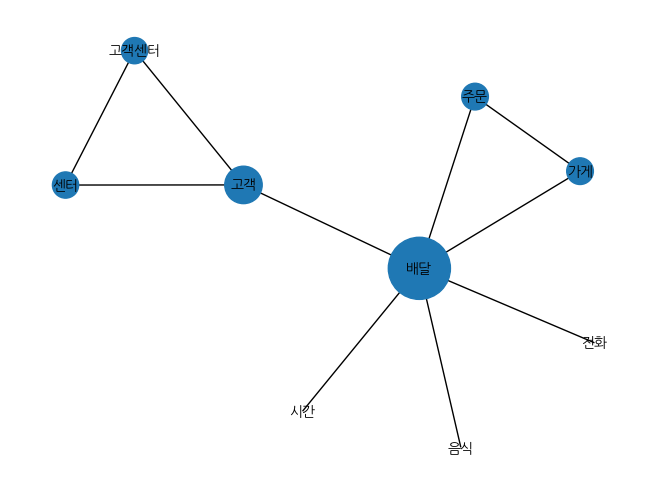

In [ ]:
# 네트워크 분석 시각화
import networkx as nx
import numpy as np
from matplotlib import pyplot as pyplot

plt.rc('font', family="NanumGothic")

G = nx.Graph()
ar = data2["items"]
G.add_edges_from(ar)

pr = nx.pagerank(G)
nsize = np.array(list(pr.values()))
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

pos = nx.kamada_kawai_layout(G)

nx.draw(G, pos, node_size=nsize, with_labels=True, font_size=10, font_family="NanumGothic")
plt.show()



